## Data

For this programming assignment, you will again be working with the Wisconsin Breast Cancer dataset. This dataset contains various measurements of the size and shape of tumors, along with the diagnosis of the tumor as benign or malignant. Further information on this dataset can be found here: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic).

This time, we will be using $k$-means clustering to discover groupings in the data, and then look at how the discovered clusters compare with the diagnosis of tumors as malignant or benign.

We start by loading the dataset into a pandas dataframe.

In [75]:
import pandas as pd

cancer_df = pd.read_csv("https://github.com/lynn0032/MLCamp2021/raw/main/breast_cancer.csv")

cancer_df.describe(include = "all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


We will drop two columns that will not be used for clustering, `id` and `Unnamed: 32`.

In [76]:
cancer_df.drop(["id", "Unnamed: 32"], axis=1, inplace = True)

cancer_df.describe(include="all")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In the cell below, we select the data we will use for clustering. We exclude diagnosis, so that we are only taking the measurements for each tumor.

In [77]:
features = list(cancer_df.columns)
features.remove("diagnosis")

X = cancer_df[features].values

## Task 1: Perform Clustering (2 points)

Now, you should create a $k$-means clustering model (call it `kmeans`) for 2 clusters (use random state 0), and fit it to the data.



In [89]:
from sklearn import cluster

# your code here
kmeans = cluster.KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [90]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(kmeans.n_clusters == 2)
assert(kmeans.random_state == 0)
assert(list(kmeans.labels_[10:15]) == [0, 1, 1, 0, 0])
print("Tests passed, but be sure to test your own code as well!")

Tests passed, but be sure to test your own code as well!


## Task 2: Compare with True Labels (2 points)

Now, use the `pandas` function `crosstab` to create a frequency table comparing the clusters with the actual tumor labels as malignant or benign.

In [92]:
# your code here
actual_tumor = cancer_df['diagnosis']
cluster_number = kmeans.labels_

pd.crosstab(actual_tumor, cluster_number)






col_0,0,1
diagnosis,,
B,356,1
M,82,130


## Task 3: Interpreting Results (4 points)

Describe the distribution of benign vs. malignant tumors in each cluster.

From what we can see printed above, the 0 clutser predominantly contains Benign tumors of about 356 and a relatively a lesser amount of Malignant that is 82. On the other hand, cluster 1 which is the second cluster contains mostly malignant tumor of 130 and only a single benign tumor.  

Suppose we were to decide to predict tumors in cluster 0 to be benign, and tumors in cluster 1 to be malignant. Answer the following questions for this scenario.

How many tumors that are actually benign would be mistakenly predicted to be malignant?

There is 1 benign tumor mistakenly predicted as malignant.

How many tumors that are actually malignant would be mistakenly predicted to be benign?

There are 82 malignant mistakenly predicted to be benign.

In the context of diagnosing and treating cancer, what would this mean for the kinds of mistakes we'd see if this model was used in the real word?

it means that there would be patients with actual malignant tumors might not receive timely and appropriate medical attention, impacting their prognosis and treatment outcomes.

there would also be false positives where patients with actual benign tumors might undergo unnecessary additional testing, treatments, or even surgeries, leading to uncessary medical procedures because of the false results.

## Task 4: Silhouette Score (4 points)

Next, you'll use the silhouette score to find the "best" value of $k$ for this data, as measured by the silhouette score.

In the following cell, we iterate through values of $k$ ranging from 2 through 50. For each value of $k$, we perform $k$-means clustering on the data (use random state 0). We compute the silhouette coefficient for the resulting clusters. Each silhouette score is appended to our list of scores, and we keep track of the best score and best value of $k$ as we iterate through.

In [94]:
from sklearn import cluster
from sklearn.metrics import silhouette_score

sil_scores = []
best_k = 0
best_score = -1

for k in range(2, 51):
  # Perform k-means clustering on the data
  # your code here
  kmeans = cluster.KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)


  # compute the silhouette score
  # your code here
  sc = silhouette_score(X, kmeans.labels_)


  # append the silhouette score to the list of scores
  # your code here
  sil_scores.append(sc)

  # check if current score is greater than best score so far,
  # if it is, update best_k and best_score
  # your code here
  if sc > best_score:
    best_k = k
    best_score = sc



print("Best k:", best_k)
print("Silhouette score:", best_score)
print(sil_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best k: 2
Silhouette score: 0.6972646156059465
[0.6972646156059465, 0.6695939093799408, 0.5334614737117133, 0.5120588504057626, 0.4857922435948333, 0.46589931177285193, 0.46824565183432537, 0.47325410485044933, 0.4676943794570639, 0.44594166980640476, 0.4509076900400816, 0.4363260793865339, 0.4100489342233295, 0.427077681075206, 0.4126429858230279, 0.40931935485609866, 0.4157959874909681, 0.40539447343132434, 0.3976782701446272, 0.3948451436430833, 0.38891328535500536, 0.404817397685478, 0.4025858385912671, 0.4002027140548449, 0.40054731097697993, 0.39437634114906395, 0.4052910100976311, 0.36632298974498284, 0.3864769106515779, 0.362983634232611, 0.38997164291584807, 0.36832039653666765, 0.4076158224396646, 0.36615379922493124, 0.3692679028837368, 0.38262442200565616, 0.3700427852871965, 0.3595205901624305, 0.3549888585714674, 0.34818791232528873, 0.34723612537416004, 0.33069957669577016, 0.35855719499166405, 0.33481805859589847, 0.34793937753820203, 0.32994974929654003, 0.331321896399

In [97]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(best_k == 2)
assert(best_score == 0.6972646156059465)
assert(sil_scores[:5] == [0.6972646156059465, 0.6695939093799408, 0.5334614737117133,
                          0.5120588504057626, 0.4857922435948333])
assert(sil_scores[-3:] == [0.3313218963997284, 0.35011460302932096, 0.3348555842767557])
print("Tests passed, but be sure to test your own code as well!")

Tests passed, but be sure to test your own code as well!


Next, we plot the silhouette scores to visualize how the score changes with $k$.

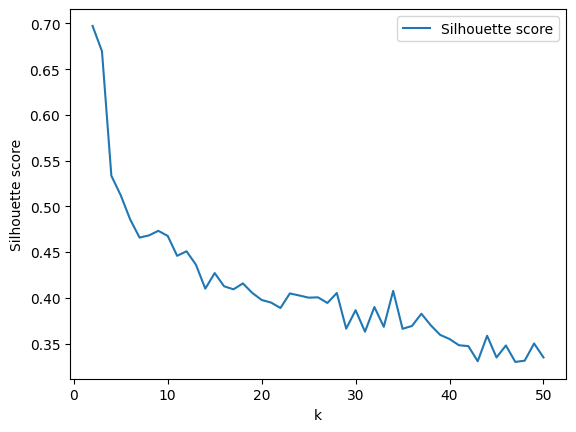

In [96]:
import matplotlib.pyplot as plt

test = plt.plot(range(2, 51), sil_scores, label = "Silhouette score")
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.legend()
plt.show()

# Data Cleaning

Now, we will perform some data cleaning to see if we can improve the quality of the clusters (when we compare them to the true diagnosis of tumors).

We'll generate histograms for our features, so we can look for features with distributions that we might want to transform.

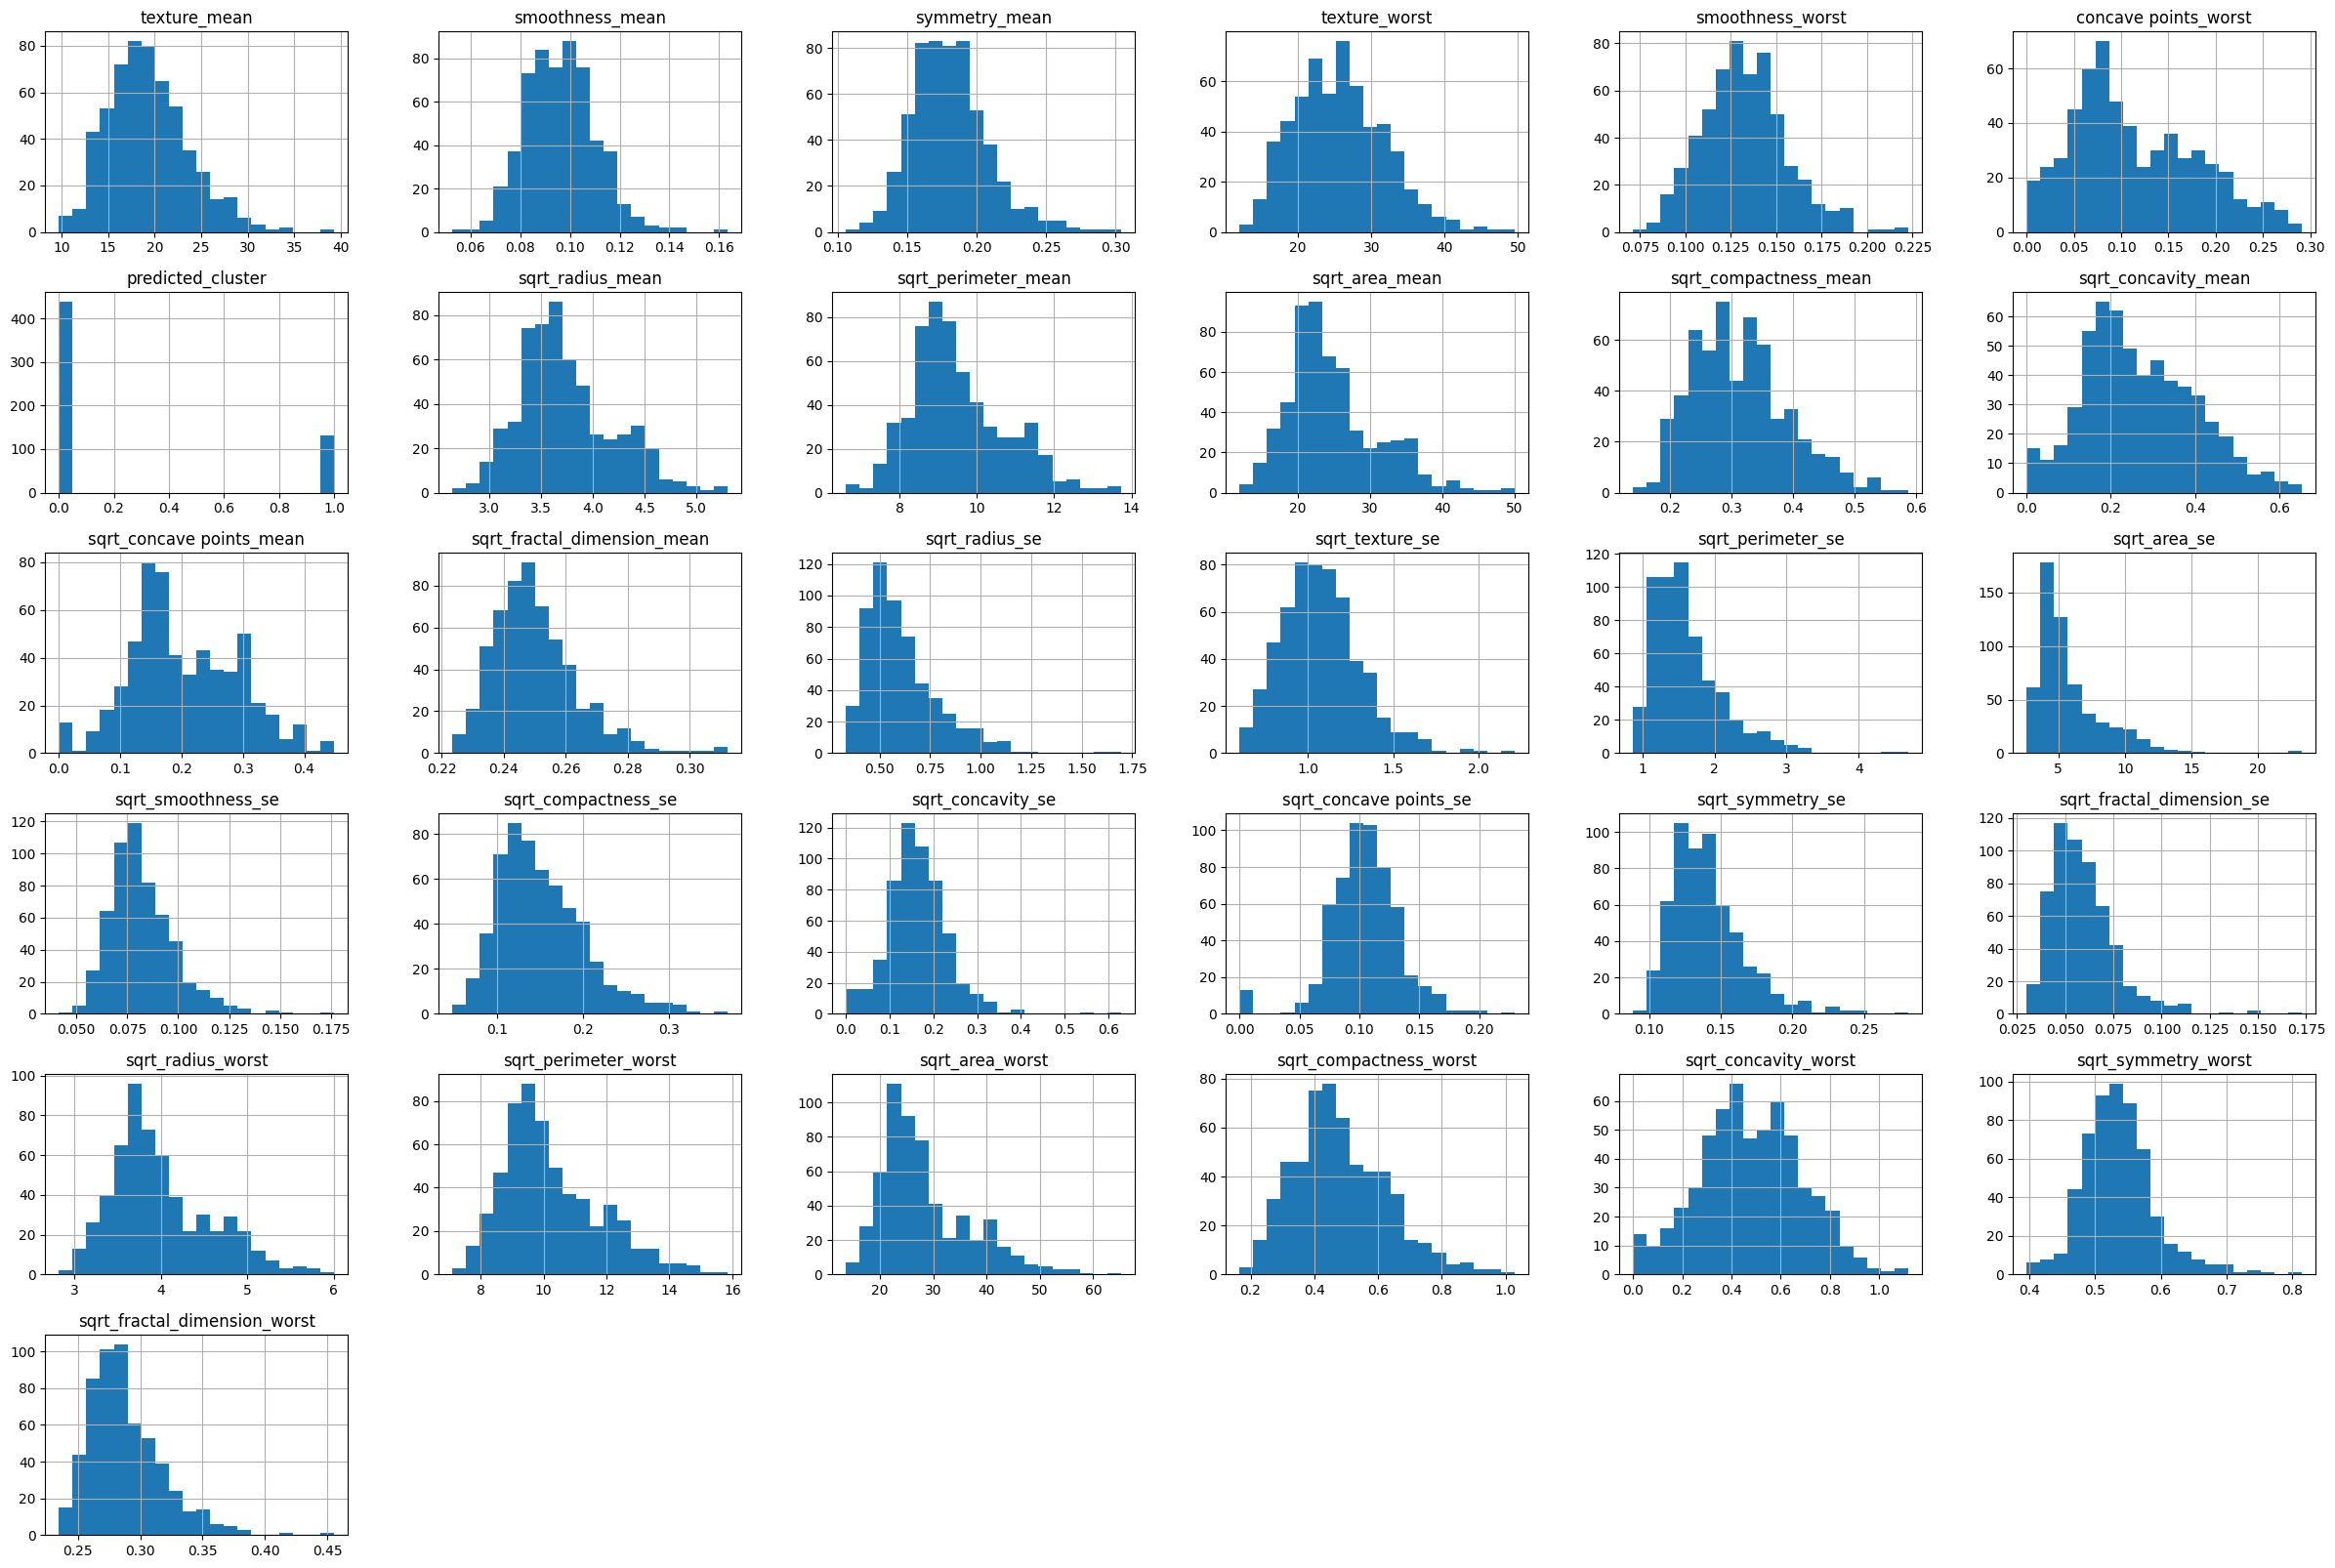

In [98]:
fig = cancer_df.hist(bins=20,figsize=(30, 20))

From this, we see that quite a few of the features are right skewed. The names of these columns are stored in the list in the next cell.

In [102]:
right_skewed = ["radius_mean", "perimeter_mean", "area_mean", "compactness_mean",
                "concavity_mean", "concave points_mean", "fractal_dimension_mean",
                "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
                "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
                "radius_worst", "perimeter_worst", "area_worst", "compactness_worst",
                "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]

## Task 5: Square Root Transformation (3 points)

For each of the features which is right skewed, you will perform a square root transformation to try to make the data more symmetric.

In the cell below, apply a square root transformation to every column listed in the list `right_skewed` (use a `for` loop, to keep your code concise). Name the new columns starting with `"sqrt_"`, and be sure to drop the old columns. For example, `"radius_mean"` should be replaced with `"sqrt_radius_mean"`.

In [105]:
from numpy import sqrt

# your code here - apply a square root transform to right skewed columns
for feature in right_skewed:
  cancer_df["sqrt_"+ feature] = cancer_df[feature].apply(sqrt)
  cancer_df.drop(columns=[feature], inplace = True)



# make a list with the new feature names - this will be used later
sqrt_features = ["sqrt_" + feature for feature in right_skewed]
for feature in features:
  if feature not in right_skewed:
    sqrt_features.append(feature)

KeyError: ignored

In [106]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
test = list(cancer_df.columns)
test.remove("diagnosis")
assert(set(test) == set(sqrt_features))
assert(list(cancer_df[sqrt_features].mean(axis = 0)) == [3.7311970064004436, 9.512031778440692, 24.81278999820845,
                                                         0.31351925951546866, 0.26735439107663866, 0.2030534603891173,
                                                         0.25022066810705895, 0.6100712087307396, 1.0781122359922601,
                                                         1.6214724973699974, 5.827882100898752, 0.08235646848480263,
                                                         0.15149562050261187, 0.16420216066579768, 0.10442620480066529,
                                                         0.14098064810310262, 0.05914822035359478, 3.9929295326743506,
                                                         10.241310667411916, 28.441644458618914, 0.4825044334392832,
                                                         0.4785030187042058, 0.5357770855923171, 0.28823604643295947,
                                                         19.289648506151142, 0.0963602811950791, 0.18116186291739894,
                                                         25.677223198594024, 0.13236859402460457, 0.11460622319859401])
print("Tests passed, but be sure to test your own code as well!")

AssertionError: ignored

Now, let's look at how this transformation affected the distribution of our data. We can see that the previously right-skewed columns are more symmetric than they were, but some of them are still clearly skewed. However, for the purposes of this programming assignment, we will call it good enough.

In [ ]:
fig = cancer_df.hist(bins=20,figsize=(30, 20))

## Task 6: Normalizing Data (2 points)

There is another issue with our data, which is that some of the columns have dramatically different scales.

For example, `texture_worst` has values ranging from about 0 to about 50, while `smoothness_mean` has values ranging from about 0 to about 0.16.

Remember that $k$-means clustering uses distances to determine how to assign datapoints to clusters. This means that columns with larger scales will have a greater impact, since they make a bigger difference when we compute distances.

To alleviate this issue, we would like all of our columns to have approximately the same scale. We can do this by rescaling each column to have mean 0 and standard deviation 1, using `StandardScaler` from Scikit-Learn.

In the cell below, apply `StandardScaler` to normalize the data. Remember that `sqrt_features` is a list containing the current names for our features. The new column names are provided for you (putting `"scaled_"` in front of the old names), and you should drop the old columns after scaling.

In [107]:
from sklearn.preprocessing import StandardScaler

new_feature_names = ["scaled_" + col for col in sqrt_features]

scaler = StandardScaler()
cancer_df[new_feature_names] = scaler.fit_transform(cancer_df[sqrt_features].values) # your code here - scale the features


# your code here - drop old columns
cancer_df.drop(sqrt_features, axis = 1, inplace=True)


cancer_df.describe(include="all")

,diagnosis,predicted_cluster,scaled_sqrt_radius_mean,scaled_sqrt_perimeter_mean,scaled_sqrt_area_mean,scaled_sqrt_compactness_mean,scaled_sqrt_concavity_mean,scaled_sqrt_concave points_mean,scaled_sqrt_fractal_dimension_mean,scaled_sqrt_radius_se,...,scaled_sqrt_compactness_worst,scaled_sqrt_concavity_worst,scaled_sqrt_symmetry_worst,scaled_sqrt_fractal_dimension_worst,scaled_texture_mean,scaled_smoothness_mean,scaled_symmetry_mean,scaled_texture_worst,scaled_smoothness_worst,scaled_concave points_worst
count,569,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.230228,5.432093e-16,5.744282e-16,4.807714e-16,2.747265e-16,-1.248757e-17,1.248757e-17,-1.017737e-15,-3.996022e-16,...,3.621395e-16,-1.998011e-16,8.866175e-16,-6.493536e-16,6.868164e-17,-8.366672e-16,1.748260e-16,1.248757e-17,-2.372638e-16,2.247763e-16
std,NaN,0.421349,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,NaN,0.000000,-2.402587e+00,-2.371147e+00,-2.049398e+00,-2.241597e+00,-2.031428e+00,-2.315748e+00,-1.951556e+00,-1.520525e+00,...,-2.166312e+00,-2.301577e+00,-2.551408e+00,-1.822633e+00,-2.229249e+00,-3.112085e+00,-2.744117e+00,-2.223994e+00,-2.682695e+00,-1.745063e+00
25%,NaN,0.000000,-6.853873e-01,-6.897014e-01,-6.885125e-01,-7.552087e-01,-7.250578e-01,-6.904393e-01,-7.317369e-01,-7.047331e-01,...,-6.747831e-01,-6.739924e-01,-6.439163e-01,-7.108377e-01,-7.259631e-01,-7.109628e-01,-7.032397e-01,-7.486293e-01,-6.912304e-01,-7.563999e-01
50%,NaN,0.000000,-1.647907e-01,-1.847047e-01,-2.135481e-01,-1.178943e-01,-1.465083e-01,-2.283594e-01,-1.569892e-01,-2.240170e-01,...,-1.514161e-01,-1.141298e-02,-8.285446e-02,-1.808914e-01,-1.046362e-01,-3.489108e-02,-7.162650e-02,-4.351564e-02,-4.684277e-02,-2.234689e-01
75%,NaN,0.000000,5.321414e-01,5.659606e-01,5.052553e-01,6.120111e-01,7.155294e-01,7.866447e-01,5.055455e-01,4.512477e-01,...,6.814778e-01,6.747696e-01,5.105342e-01,5.169447e-01,5.841756e-01,6.361990e-01,5.307792e-01,6.583411e-01,5.975448e-01,7.125100e-01


In [108]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
test = list(cancer_df.columns)
test.remove("diagnosis")
assert(set(test) == set(new_feature_names))
assert(list(cancer_df[new_feature_names].mean(axis = 0)) == [5.432092971100942e-16, 5.744282222313639e-16,
                                                              4.807714468675546e-16, 2.7472654106717405e-16,
                                                              -1.2487570048507911e-17, 1.2487570048507911e-17,
                                                              -1.0177369589533948e-15, -3.9960224155225316e-16,
                                                              -3.1843303623695177e-16, 2.4975140097015826e-16,
                                                              -4.24577381649269e-16, 4.120898116007611e-16,
                                                              -3.371643913097136e-16, 1.8731355072761868e-17,
                                                              -5.119903719888243e-16, 1.0177369589533948e-15,
                                                              1.8731355072761868e-16, -1.7482598067911076e-16,
                                                              3.6213953140672944e-16, 3.2467682126120573e-16,
                                                              3.6213953140672944e-16, -1.9980112077612658e-16,
                                                              8.866174734440618e-16, -6.493536425224115e-16,
                                                              6.868163526679351e-17, -8.366671932500301e-16,
                                                              1.7482598067911076e-16, 1.2487570048507911e-17,
                                                              -2.3726383092165034e-16, 2.247762608731424e-16])
print("Tests passed, but be sure to test your own code as well!")

AssertionError: ignored

We can look at the histograms again. Note that standardizing does not change the shape of the distribution, just the scale.

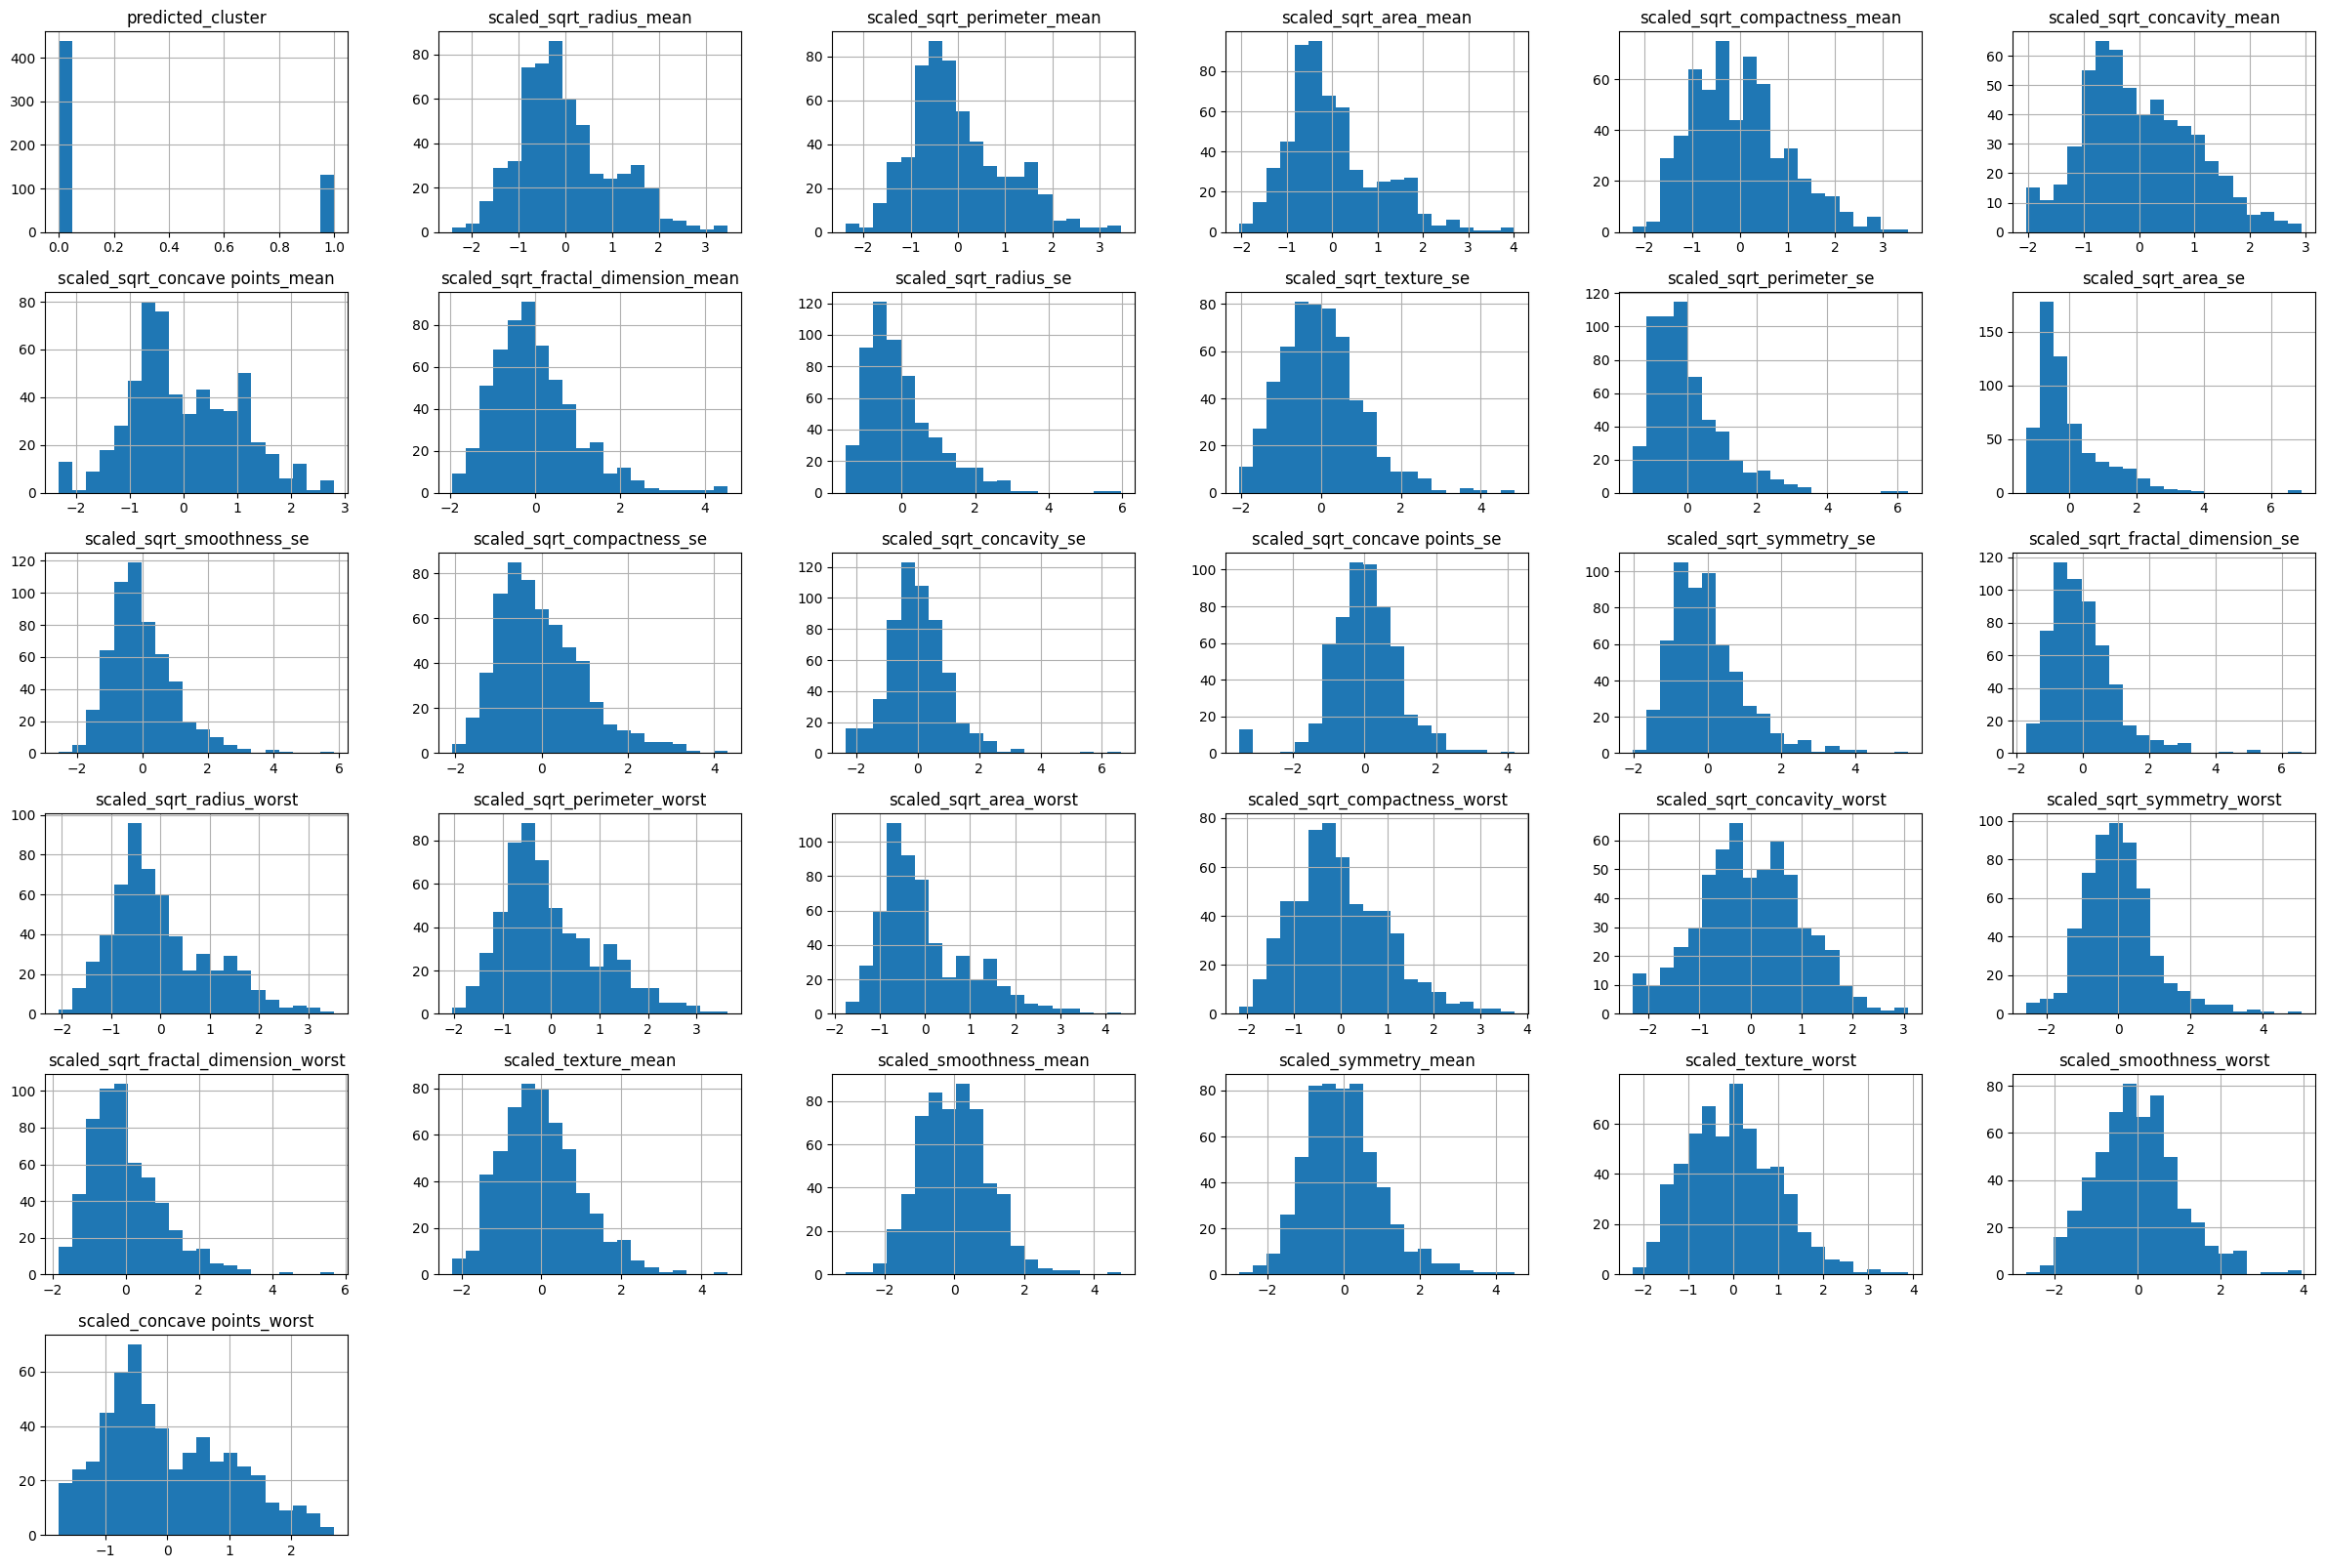

In [109]:
fig = cancer_df.hist(bins=20,figsize=(30, 20))

## $k$-Means on Scaled Data

Now that we've transformed the data, let's try $k$-means clustering again, for $k=2$.

In [110]:
X = cancer_df[new_feature_names].values

# Perform k-means clustering
kmeans = cluster.KMeans(n_clusters=2, random_state = 0)
kmeans.fit(X)

# compute silhouette coefficient
silhouette_score(X, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.32371389962758235

Interestingly, the silhouette coefficient is lower than when we used the raw data. However, because we changed the data, it isn't useful to compare the values of the silhouette coefficient, and this doesn't necessarily mean we have a worse clustering.

Let's compare the clusters with the diagnosis of the tumors.

In [111]:
actual_diagnosis = cancer_df['diagnosis']
cluster_number = kmeans.labels_

pd.crosstab(actual_diagnosis, cluster_number)

col_0,0,1
diagnosis,,
B,338,19
M,28,184


## Task 7: Interpreting Results (3 points)

Suppose we predict tumors in cluster 0 to be benign, and we predict tumors in cluster 1 to be malignant. With these predictions, how many tumors are misclassified (either as malignant or benign)?

47 tumors taking the sum of 28 and 19

How does the number of misclassifications compare with the number of misclassifications we had when using clusters generated from the raw data?

83 tumors have been miscalssified which is greater when compared with what we had when using clutsers the raw data generated which is 47--that's the amount generated from the normalized data.



Compared with clustering on the raw data, have the types of misclassification errors that we make changed here? How?

In the normalized data, misclassifications occurred for 19 benign tumors and 28 malignant tumors, whereas the raw data had misclassifications for 1 benign tumor and 82 malignant tumors. The normalized data shows a higher count of misclassified benign tumors compared to the raw data, but it shows fewer misclassifications for malignant tumors. The normalized data did better in identifying malignant tumors, while the raw data performed well in classifying benign tumors.